# **Covid-19 Detection in X-Ray using Machine Learning & Deep Learning for (Multi Class Classification)**

# Use Dataset and Connect to Drive

Dataset Link : [Dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)

In [ ]:
# Covid-19 Detection from X-RAY using 'covid19-radiography-database' from Kaggle Dataset

#  ! pip install -q kaggle
#  from google.colab import files
#  files.upload()
#  ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d tawsifurrahman/covid19-radiography-database
# !mkdir covid
# ! unzip covid19-radiography-database.zip -d covid


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import Libraries and Files

In [2]:
!pip install livelossplot

import os
import shutil
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, AveragePooling2D,Input
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.applications import VGG16, InceptionV3
from sklearn.metrics import accuracy_score
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import cv2
from keras.preprocessing import image
import matplotlib.image as mpimg


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Create Test & Train Dataset for normal,viral,covid

In [3]:
class_names = ['normal', 'viral', 'covid']
root_dir = '/content/drive/My Drive/code19/COVID-19 Radiography Database'
source_dirs = ['NORMAL', 'Viral Pneumonia', 'COVID-19']

if os.path.isdir(os.path.join(root_dir, source_dirs[1])):
    os.mkdir(os.path.join(root_dir, 'test'))

    for i, d in enumerate(source_dirs):
        os.rename(os.path.join(root_dir, d), os.path.join(root_dir,train, class_names[i]))

    for c in class_names:
        os.mkdir(os.path.join(root_dir, 'test', c))

    for c in class_names:
        images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('png')]
        selected_images = random.sample(images, 30)
        for image in selected_images:
            source_path = os.path.join(root_dir, c, image)
            target_path = os.path.join(root_dir, 'test', c, image)
            shutil.move(source_path, target_path)

# Show Images

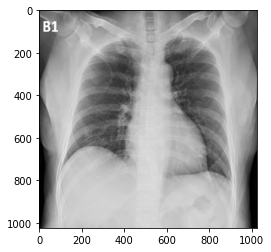

In [ ]:
import matplotlib.image as mpimg
im= mpimg.imread('/content/drive/My Drive/code19/COVID-19 Radiography Database/train/covid/COVID-19 (10).png')
plt.imshow(im, cmap='gray')

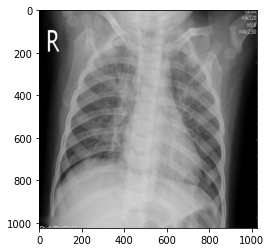

In [ ]:
im= mpimg.imread('/content/drive/My Drive/code19/COVID-19 Radiography Database/train/viral/Viral Pneumonia (1).png')
plt.imshow(im, cmap='gray')

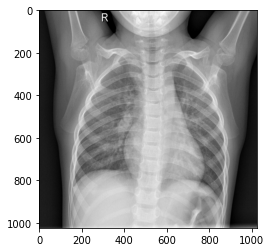

In [ ]:
im= mpimg.imread('/content/drive/My Drive/code19/COVID-19 Radiography Database/train/normal/NORMAL (1).png')
plt.imshow(im, cmap='gray')

# Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode="nearest",
                                   validation_split=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/code19/COVID-19 Radiography Database/train',
    target_size=(224,224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/code19/COVID-19 Radiography Database/train', 
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation')
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/code19/COVID-19 Radiography Database/test', 
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='categorical',
)

Found 2394 images belonging to 3 classes.
Found 421 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


# Model Creation and Training

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        2

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKerasTF
m = ModelCheckpoint('model1.h5',monitor='val_loss',save_best_only=False,save_weights_only=False,)
e = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks=[m, PlotLossesKerasTF()]

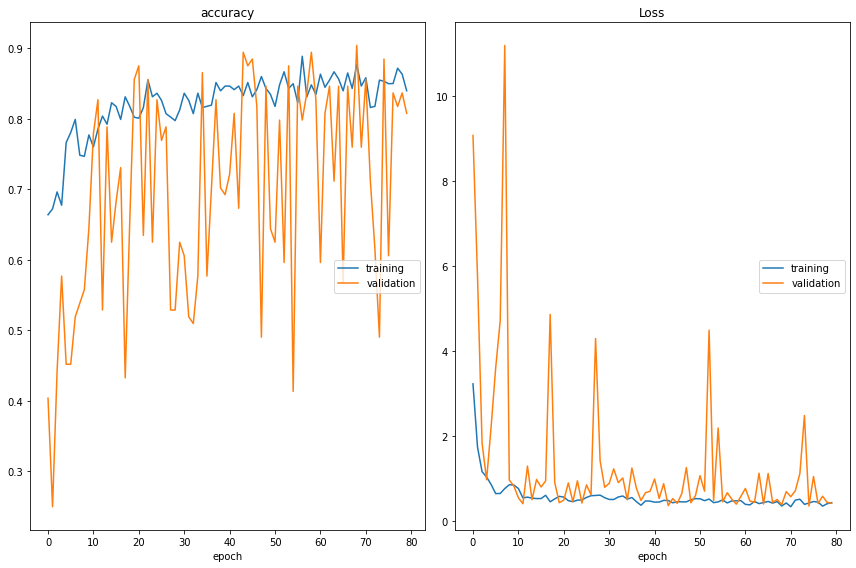

accuracy
	training         	 (min:    0.664, max:    0.889, cur:    0.840)
	validation       	 (min:    0.250, max:    0.904, cur:    0.808)
Loss
	training         	 (min:    0.340, max:    3.229, cur:    0.434)
	validation       	 (min:    0.355, max:   11.184, cur:    0.420)
74/74 [==============================] - 23s 312ms/step - loss: 0.4341 - accuracy: 0.8396 - val_loss: 0.4203 - val_accuracy: 0.8077


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 80,callbacks=callbacks,verbose=1)

In [29]:
from tensorflow.keras.applications import VGG16, InceptionV3

In [30]:
baseModel = VGG16(include_top=False,weights='imagenet', input_tensor=Input(shape=(224,224,3)))

58892288/58889256 [==============================] - 1s 0us/step


In [31]:
head = baseModel.output
head = AveragePooling2D(pool_size=(4,4))(head)
head = Dropout(0.5)(head)
head = Flatten()(head)
head = Dense(64,activation='relu')(head)
head = Dropout(0.5)(head)
head = Dense(3, activation='softmax')(head)
model = Model(inputs=baseModel.input, outputs=head)
for layer in baseModel.layers:
  layer.trainable=False

In [32]:
opt = Adam(lr=1e-3, decay=1e-3/80)

In [33]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [34]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

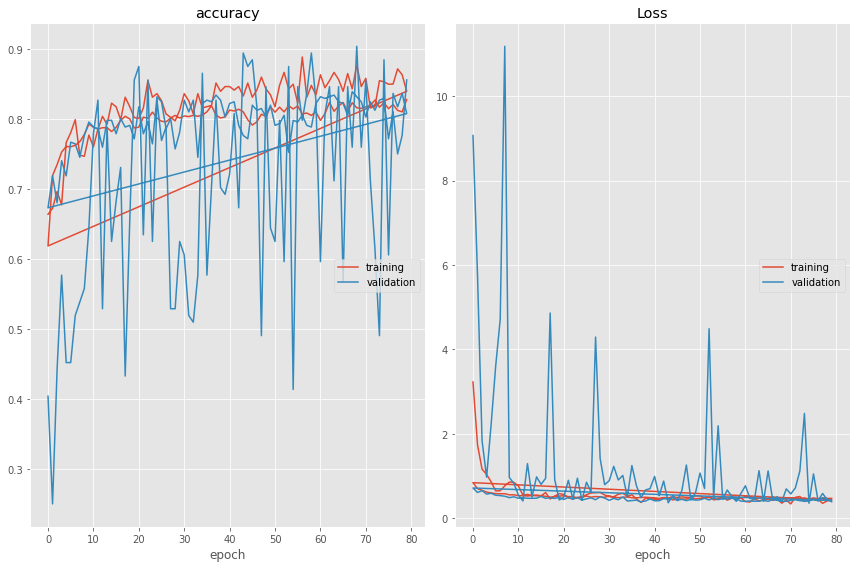

accuracy
	training         	 (min:    0.619, max:    0.889, cur:    0.828)
	validation       	 (min:    0.250, max:    0.904, cur:    0.856)
Loss
	training         	 (min:    0.340, max:    3.229, cur:    0.471)
	validation       	 (min:    0.355, max:   11.184, cur:    0.392)
299/299 [==============================] - 95s 318ms/step - loss: 0.4709 - accuracy: 0.8277 - val_loss: 0.3924 - val_accuracy: 0.8558


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples//8 ,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples//8 ,
    epochs = 80, callbacks=callbacks, verbose=1)

#Load Trained Model

In [37]:
model = load_model('/content/drive/My Drive/code19/multiclass/modelvgg3.h5')

# Predict for Test Images

In [38]:
predict = model.predict(test_generator,steps=len(test_generator.filenames))

In [39]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_generator.classes, np.argmax(predict,axis=1))
acc

0.7666666666666667

In [15]:
img_src="/content/drive/My Drive/code19/COVID-19 Radiography Database/test/covid/COVID-19 (28).png"
testimg1=image.load_img(img_src,target_size=(224, 224))
testimg1=image.img_to_array(testimg1)
testimg1=np.expand_dims(testimg1,axis=0)
testimg1= testimg1/255.0
result=model.predict(testimg1)
print(result)
re=[]
re0=result[0][0]
re1=result[0][1]
re2=result[0][2]
re.append(re0)
re.append(re1)
re.append(re2)
# print(max(re))
max = re[0]
index=0
for i in range(0,len(re)):
    if re[i] > max:
      max=re[i]
      index=i
if index == 1:
    prediction = "Normal"
elif index ==0:
    prediction = "COVID"
else:
    prediction ='Viral'

[[0.84966564 0.09669182 0.05364258]]


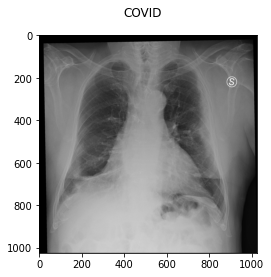

In [ ]:


target_width = 50
target_height = 50
# img = img.reshape(1, target_width, target_height, 3)
fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)
np_img = mpimg.imread(img_src)
plt.imshow(np_img)

# Confusion Matrix

In [52]:
train_generator.class_indices

{'covid': 0, 'normal': 1, 'viral': 2}

In [53]:
y_actual = []
y_test = []

In [54]:
# Testing on COVID data

folder_path="/content/drive/My Drive/code19/COVID-19 Radiography Database/test/covid/"
for i in os.listdir(folder_path):
  y_actual.append(0)
  img_src=folder_path+i
  testimg1=image.load_img(img_src,target_size=(224, 224))
  testimg1=image.img_to_array(testimg1)
  testimg1=np.expand_dims(testimg1,axis=0)
  testimg1= testimg1/255.0
  result=model.predict(testimg1)
  re=[]
  re0=result[0][0]
  re1=result[0][1]
  re2=result[0][2]
  re.append(re0)
  re.append(re1)
  re.append(re2)
  max = re[0]
  index=0
  for i in range(0,len(re)):
      if re[i] > max:
        max=re[i]
        index=i
  if index == 1:
      y_test.append(1)
  elif index ==0:
      y_test.append(0)
  else:
      y_test.append(2)

#Testing on Normal Data

folder_path="/content/drive/My Drive/code19/COVID-19 Radiography Database/test/normal/"
for i in os.listdir(folder_path):
  y_actual.append(1)
  img_src=folder_path+i
  testimg1=image.load_img(img_src,target_size=(224, 224))
  testimg1=image.img_to_array(testimg1)
  testimg1=np.expand_dims(testimg1,axis=0)
  testimg1= testimg1/255.0
  result=model.predict(testimg1)
  re=[]
  re0=result[0][0]
  re1=result[0][1]
  re2=result[0][2]
  re.append(re0)
  re.append(re1)
  re.append(re2)
  max = re[0]
  index=0
  for i in range(0,len(re)):
      if re[i] > max:
        max=re[i]
        index=i
  if index == 1:
      y_test.append(1)
  elif index ==0:
      y_test.append(0)
  else:
      y_test.append(2)

# Testing on Viral Data

folder_path="/content/drive/My Drive/code19/COVID-19 Radiography Database/test/viral/"
for i in os.listdir(folder_path):
  y_actual.append(2)
  img_src=folder_path+i
  testimg1=image.load_img(img_src,target_size=(224, 224))
  testimg1=image.img_to_array(testimg1)
  testimg1=np.expand_dims(testimg1,axis=0)
  testimg1= testimg1/255.0
  result=model.predict(testimg1)
  # print(result)
  re=[]
  re0=result[0][0]
  re1=result[0][1]
  re2=result[0][2]
  re.append(re0)
  re.append(re1)
  re.append(re2)
  # print(max(re))
  max = re[0]
  index=0
  for i in range(0,len(re)):
      if re[i] > max:
        max=re[i]
        index=i
  if index == 1:
      y_test.append(1)
      # prediction = "Normal"
  elif index ==0:
      y_test.append(0)
      # prediction = "COVID"
  else:
      y_test.append(2)
      # prediction ='Viral'

In [55]:
cm = confusion_matrix(y_actual,y_test)

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[16  3 11]
 [ 0 29  1]
 [ 0  6 24]]


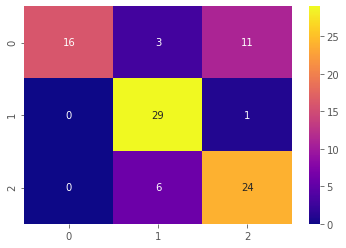

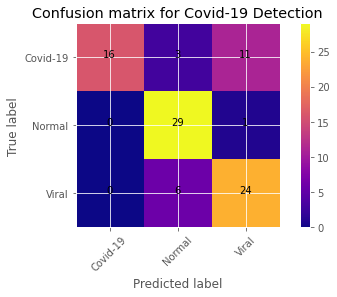

In [57]:
sns.heatmap(cm,cmap = "plasma" , annot=True)
class_names = ["Covid-19","Normal","Viral"]

plt.figure()
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix for Covid-19 Detection',cmap="plasma")

In [58]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


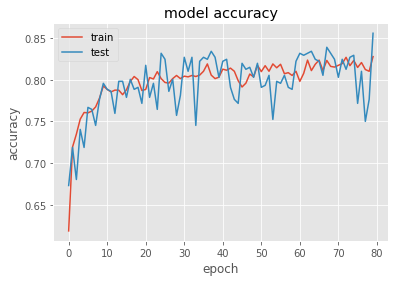

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


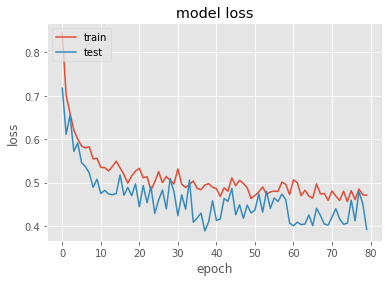

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

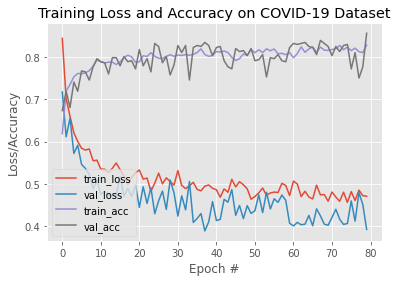

In [61]:
N = 80
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.jpg")

In [28]:
from sklearn.metrics import classification_report

print('Classification Report')
target_names = ['COVID','NOrmal','Viral']
print(classification_report(test_generator.classes, y_test, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       COVID       0.89      0.57      0.69        30
      NOrmal       0.71      0.97      0.82        30
       Viral       0.77      0.77      0.77        30

    accuracy                           0.77        90
   macro avg       0.79      0.77      0.76        90
weighted avg       0.79      0.77      0.76        90

